In [2]:
import pandas as pd
from io import StringIO

# Los datos en formato CSV
data = """
CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3
10,Female,30,19,72
11,Male,67,19,14
12,Female,35,19,99
13,Female,58,20,15
14,Female,24,20,77
15,Male,37,20,13
16,Male,22,20,79
17,Female,35,21,35
18,Male,20,21,66
19,Male,52,23,29
20,Female,35,23,98
21,Male,35,24,35
22,Male,25,24,73
23,Female,46,25,5
24,Male,31,25,73
25,Female,54,28,14
26,Male,29,28,82
27,Female,45,28,32
28,Male,35,28,61
29,Female,40,29,31
30,Female,23,29,87
31,Male,60,30,4
32,Female,21,30,73
33,Male,53,33,4
34,Male,18,33,92
35,Female,49,33,14
36,Female,21,33,81
37,Female,42,34,17
38,Female,30,34,73
39,Female,36,37,26
40,Female,20,37,75
41,Female,65,38,35
42,Male,24,38,92
43,Male,48,39,36
44,Female,31,39,61
45,Female,49,39,28
46,Female,24,39,65
47,Female,50,40,55
48,Female,27,40,47
49,Female,29,40,42
50,Female,31,40,42
51,Female,49,42,52
52,Male,33,42,60
53,Female,31,43,54
54,Male,59,43,60
55,Female,50,43,45
56,Male,47,43,41
57,Female,51,44,50
58,Male,69,44,46
59,Female,27,46,51
60,Male,53,46,46
61,Male,70,46,56
62,Male,19,46,55
63,Female,67,47,52
64,Female,54,47,59
65,Male,63,48,51
66,Male,18,48,59
67,Female,43,48,50
68,Female,68,48,48
69,Male,19,48,59
70,Female,32,48,47
71,Male,70,49,55
72,Female,47,49,42
73,Female,60,50,49
74,Female,60,50,56
75,Male,59,54,47
76,Male,26,54,54
77,Female,45,54,53
78,Male,40,54,48
79,Female,23,54,52
80,Female,49,54,42
81,Male,57,54,51
82,Male,38,54,55
83,Male,67,54,41
84,Female,46,54,44
85,Female,21,54,57
86,Male,48,54,46
87,Female,55,57,58
88,Female,22,57,55
89,Female,34,58,60
90,Female,50,58,46
91,Female,68,59,55
92,Male,18,59,41
93,Male,48,60,49
94,Female,40,60,40
95,Female,32,60,42
96,Male,24,60,52
97,Female,47,60,47
98,Female,27,60,50
99,Male,48,61,42
100,Male,20,61,49
101,Female,23,62,41
102,Female,49,62,48
103,Male,67,62,59
104,Male,26,62,55
105,Male,49,62,56
106,Female,21,62,42
107,Female,66,63,50
108,Male,54,63,46
109,Male,68,63,43
110,Male,66,63,48
111,Male,65,63,52
112,Female,19,63,54
113,Female,38,64,42
114,Male,19,64,46
115,Female,18,65,48
116,Female,19,65,50
117,Female,63,65,43
118,Female,49,65,59
119,Female,51,67,43
120,Female,50,67,57
121,Male,27,67,56
122,Female,38,67,40
123,Female,40,69,58
124,Male,39,69,91
125,Female,23,70,29
126,Female,31,70,77
127,Male,43,71,35
128,Male,40,71,95
129,Male,59,71,11
130,Male,38,71,75
131,Male,47,71,9
132,Male,39,71,75
133,Female,25,72,34
134,Female,31,72,71
135,Male,20,73,5
136,Female,29,73,88
137,Female,44,73,7
138,Male,32,73,73
139,Male,19,74,10
140,Female,35,74,72
141,Female,57,75,5
142,Male,32,75,93
143,Female,28,76,40
144,Female,32,76,87
145,Male,25,77,12
146,Male,28,77,97
147,Male,48,77,36
148,Female,32,77,74
149,Female,34,78,22
150,Male,34,78,90
151,Male,43,78,17
152,Male,39,78,88
153,Female,44,78,20
154,Female,38,78,76
155,Female,47,78,16
156,Female,27,78,89
157,Male,37,78,1
158,Female,30,78,78
159,Male,34,78,1
160,Female,30,78,73
161,Female,56,79,35
162,Female,29,79,83
163,Male,19,81,5
164,Female,31,81,93
165,Male,50,85,26
166,Female,36,85,75
167,Male,42,86,20
168,Female,33,86,95
169,Female,36,87,27
170,Male,32,87,63
171,Male,40,87,13
172,Male,28,87,75
173,Male,36,87,10
174,Male,36,87,92
175,Female,52,88,13
176,Female,30,88,86
177,Male,58,88,15
178,Male,27,88,69
179,Male,59,93,14
180,Male,35,93,90
181,Female,37,97,32
182,Female,32,97,86
183,Male,46,98,15
184,Female,29,98,88
185,Female,41,99,39
186,Male,30,99,97
187,Female,54,101,24
188,Male,28,101,68
189,Female,41,103,17
190,Female,36,103,85
191,Female,34,103,23
192,Female,32,103,69
193,Male,33,113,8
194,Female,38,113,91
195,Female,47,120,16
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74
199,Male,32,137,18
200,Male,30,137,83
"""

# Convertir los datos a un DataFrame
df = pd.read_csv(StringIO(data))

# Mostrar las primeras filas del DataFrame
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Verificar si hay valores faltantes
missing_values = df.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

# No hay valores faltantes en este conjunto de datos

Valores faltantes por columna:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# Seleccionar las características para entrenar el modelo
X = df.iloc[:, 2:].values  # Ignoramos la columna 'CustomerID' y 'Gender'

# Mostrar las primeras filas de las características seleccionadas
print("Características seleccionadas:\n", X[:5])

Características seleccionadas:
 [[19 15 39]
 [21 15 81]
 [20 16  6]
 [23 16 77]
 [31 17 40]]


In [6]:
# Paso 4: Entrenar el modelo de clustering jerárquico

from sklearn.cluster import AgglomerativeClustering

# Seleccionar el número de clusters
n_clusters = 5

# Instanciar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=n_clusters)

# Entrenar el modelo
model.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

AgglomerativeClustering(n_clusters=5)

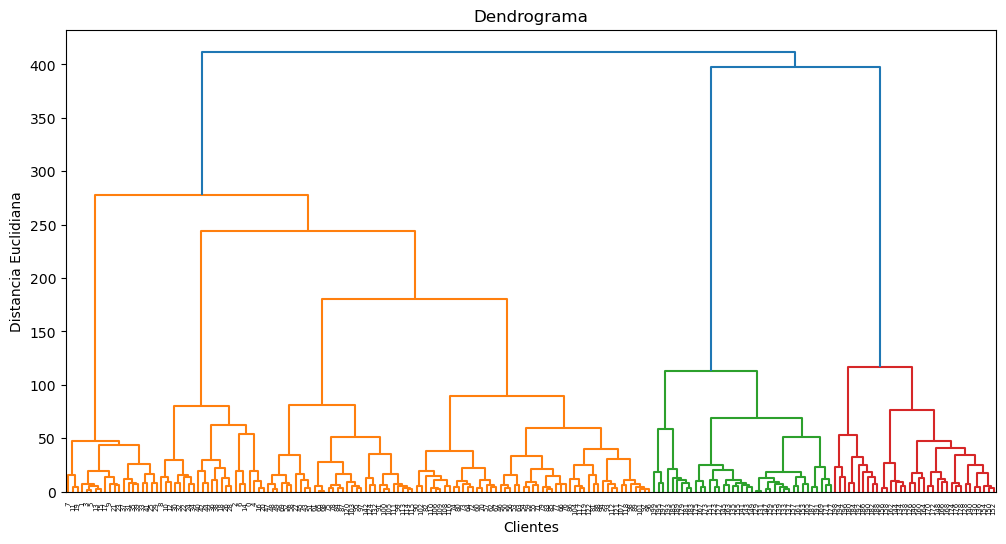

In [10]:
# Paso 6: Realizar las diferentes gráficas que permitan visualizar los resultados del modelo de hierarchical clustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 6))

# Dendrograma
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [13]:
# Paso 7: Interpretar, analizar y documentar los resultados obtenidos

# Importar la clase AgglomerativeClustering del módulo cluster de la biblioteca sklearn
from sklearn.cluster import AgglomerativeClustering

# Definir el modelo de clustering jerárquico
hc_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

# Ajustar el modelo a los datos
y_hc = hc_model.fit_predict(X)

# Crear un DataFrame con los datos y las asignaciones de clústeres
hc_cluster_df = pd.DataFrame(X, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
hc_cluster_df['Cluster'] = y_hc

# Mostrar los primeros registros del DataFrame con la asignación de clústeres
hc_cluster_df.head()

C:\Users\Skigdot\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4
